In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform


In [25]:
fic_epita_kantar_codes = pd.read_csv('data/fic_epita_kantar_codes.csv', sep=';')
fic_epita_kantar_codes

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,...,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,...,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,...,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,...,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,...,2,3,2,1,NaN,3,1,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,NaN,1.0,...,2,2,1,2,NaN,6,3,69,0,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,NaN,1.0,...,2,1,1,2,NaN,4,3,53,0,1
4997,4998,MET20_288029,1.094695,0,1,0,0,2,NaN,2.0,...,1,2,1,2,2.0,6,3,75,0,2
4998,4999,MET20_1235808,2.022023,0,0,1,0,3,NaN,1.0,...,2,3,2,1,NaN,2,3,33,1,3


In [26]:
from utils.utils import select_features
columns = [
    'A9_1_slice', 'A9_2_slice', 'A9_3_slice', 'A9_4_slice', 'A9_5_slice', 
    'A9_6_slice', 'A9_7_slice', 'A9_8_slice', 'A9_9_slice', 'A9_10_slice', 
    'A9_11_slice', 'A9_12_slice', 'A9_13_slice', 'A9_14_slice', 'A9_15_slice', 
    'A9_16_slice', 'A10_1_slice', 'A10_2_slice', 'A10_3_slice', 'A10_4_slice', 
    'A10_5_slice', 'A10_6_slice', 'A10_7_slice', 'A10_8_slice', 'A11_1_slice', 
    'A11_2_slice', 'A11_3_slice', 'A11_4_slice', 'A11_5_slice', 'A11_6_slice', 
    'A11_7_slice', 'A11_8_slice', 'A11_9_slice', 'A11_10_slice', 'A11_11_slice', 
    'A11_12_slice', 'A11_13_slice'
]

# On remplace les valeurs manquantes par 0 (car les valeurs manquantes sont des valeurs non cochées)
fic_epita_kantar_codes[columns] = fic_epita_kantar_codes[columns].fillna(0)

# On ne garde que les colonnes qui nous intéressent
fic_epita_kantar_codes = fic_epita_kantar_codes[['cle', 'Respondent_ID', 'weight'] + columns]
fic_epita_kantar_codes

,cle,Respondent_ID,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,1,MET20_999999996,2.501255,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,MET20_98888888,0.722914,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,3,MET20_1978307,1.039611,3,2,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2
3,4,MET20_1302078,0.976590,1,2,2,2,3,2,3,...,2,1,2,3,3,3,2,2,1,2
4,5,MET20_1869308,0.812315,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,3,2,3,4,3,2,2,...,2,1,2,1,1,1,1,1,1,1
4996,4997,MET20_80000348,1.257884,2,3,4,3,3,2,4,...,2,2,3,2,2,2,2,3,2,4
4997,4998,MET20_288029,1.094695,3,4,4,3,2,2,4,...,3,2,3,3,3,2,3,3,2,3
4998,4999,MET20_1235808,2.022023,3,3,4,3,3,2,3,...,3,3,2,3,2,3,2,2,1,3


## Choix du nombre de groupes

In [35]:
# Combine these columns into a feature space
features = select_features(fic_epita_kantar_codes, columns)
features = features.values
features

array([[2, 2, 2, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [3, 2, 2, ..., 2, 2, 2],
       ...,
       [3, 4, 4, ..., 3, 2, 3],
       [3, 3, 4, ..., 2, 1, 3],
       [3, 3, 3, ..., 3, 2, 3]], dtype=int64)

In [4]:
weights = fic_epita_kantar_codes['weight'].values

len(weights)

5000

In [5]:
# Standardize the feature space
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled[0]

array([-0.2640333 , -0.82857731, -0.76535321, -0.69281308, -0.82116736,
       -0.2763925 , -0.46616386, -0.49771748, -0.10796943, -0.48102038,
        0.08546965, -1.08720179, -0.84263013, -0.06409145, -0.33781819,
       -0.65054533,  0.386317  ,  0.28441199, -0.6139091 , -0.13282554,
        0.356308  , -0.87857118, -0.20681138, -0.40066784,  0.11494051,
        0.07519132,  0.160471  , -0.02949588,  0.14223603,  0.1858171 ,
        0.08752076, -0.13853922, -0.34101514,  0.032618  , -0.30186021,
        0.03040058, -0.18203054])

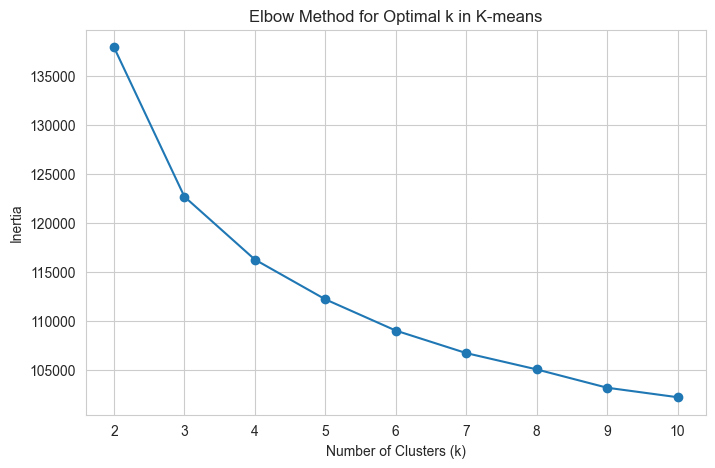

In [6]:
inertia = []
k_range = range(2, 11)  # Essayer de 1 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled, sample_weight=weights)
    inertia.append(kmeans.inertia_)

# Affichage du graphique de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k in K-means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.show()

In [7]:
from utils.utils import weighted_distance_matrix

weighted_distances = weighted_distance_matrix(features_scaled, weights)

# Conversion en format condensé pour linkage
condensed_weighted_distances = squareform(weighted_distances)

# Clustering hiérarchique avec la matrice de distances pondérées
Z = linkage(condensed_weighted_distances, method='ward')
Z

100%|██████████| 5000/5000 [01:40<00:00, 49.59it/s] 


array([[3.00000000e+02, 3.79300000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.22700000e+03, 2.60300000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.77000000e+02, 4.41000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.99300000e+03, 9.99400000e+03, 1.48746014e+02, 1.14100000e+03],
       [9.99200000e+03, 9.99500000e+03, 1.80086864e+02, 3.85900000e+03],
       [9.99600000e+03, 9.99700000e+03, 2.79087602e+02, 5.00000000e+03]])

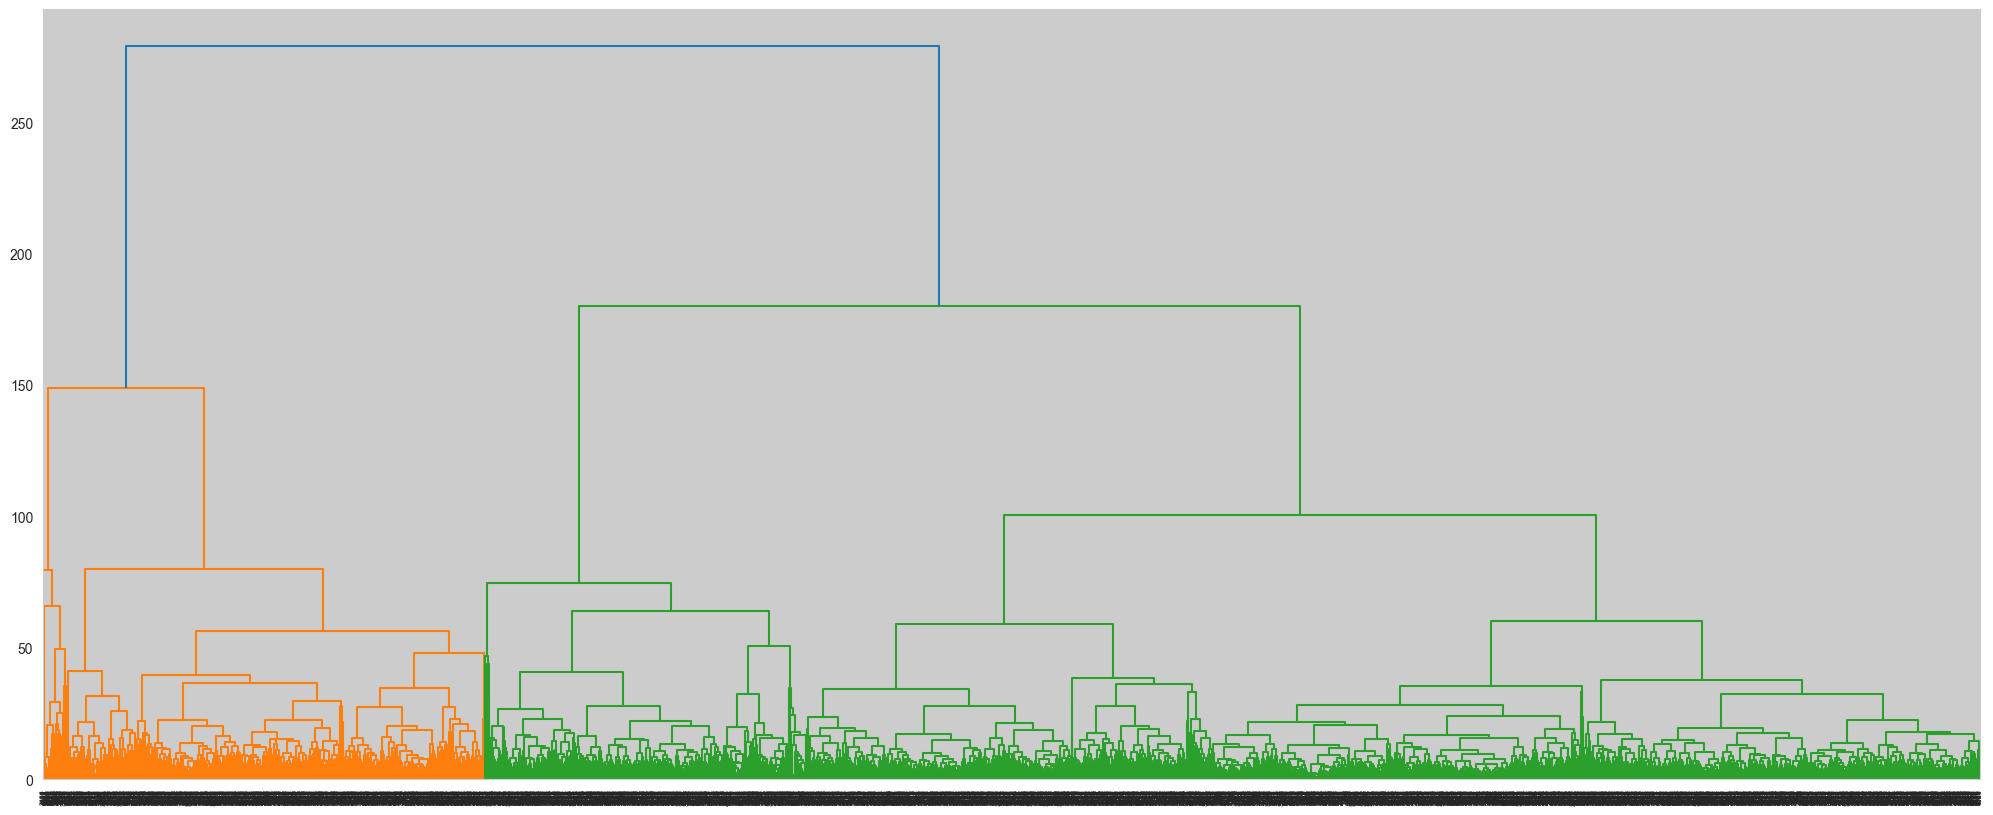

In [8]:
plt.figure(figsize=(25, 10))
dendrogram(Z, orientation='top')
plt.show()

## K-means clustering

In [27]:
# On choisit 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled, sample_weight=weights)

# Ajout des labels dans le dataframe
fic_epita_kantar_codes['cluster'] = kmeans.labels_
fic_epita_kantar_codes

C:\Users\jujus\AppData\Local\Temp\ipykernel_19288\2825671841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fic_epita_kantar_codes['cluster'] = kmeans.labels_


,cle,Respondent_ID,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,...,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,MET20_999999996,2.501255,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,2,MET20_98888888,0.722914,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,3,MET20_1978307,1.039611,3,2,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,0
3,4,MET20_1302078,0.976590,1,2,2,2,3,2,3,...,1,2,3,3,3,2,2,1,2,0
4,5,MET20_1869308,0.812315,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,3,2,3,4,3,2,2,...,1,2,1,1,1,1,1,1,1,3
4996,4997,MET20_80000348,1.257884,2,3,4,3,3,2,4,...,2,3,2,2,2,2,3,2,4,1
4997,4998,MET20_288029,1.094695,3,4,4,3,2,2,4,...,2,3,3,3,2,3,3,2,3,1
4998,4999,MET20_1235808,2.022023,3,3,4,3,3,2,3,...,3,2,3,2,3,2,2,1,3,1


In [45]:
# Sauvegarde du df
fic_epita_kantar_codes.to_csv('data/orange.csv', index=False)

In [28]:
# On regarde la répartition des clusters
fic_epita_kantar_codes['cluster'].value_counts()

cluster
0    2039
1    1464
3    1128
2     369
Name: count, dtype: int64

In [30]:
# On regarde les moyennes des features par cluster
cluster_means = fic_epita_kantar_codes.groupby('cluster').mean(numeric_only=True)
cluster_means

,cle,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
cluster,,,,,,,,,,,,,,,,,,,,,
0,2481.047572,0.969827,2.050025,2.534085,2.460520,2.404120,2.701815,2.187837,2.280039,2.223149,...,1.995586,1.831780,1.860226,1.870525,2.028445,2.201569,1.878372,2.130947,1.908288,2.044139
1,2516.032104,0.963660,2.663251,3.214481,3.226093,3.155738,2.726776,2.306694,3.111339,2.973361,...,2.321721,2.212432,2.079235,2.258197,2.511612,2.645492,2.351776,2.691940,2.303962,2.624317
2,2569.116531,1.048862,3.341463,3.699187,3.710027,3.734417,2.918699,2.926829,3.612466,3.612466,...,3.119241,3.211382,2.815718,3.249322,3.406504,3.447154,3.295393,3.474255,3.214092,3.455285
3,2493.057624,0.945594,1.539894,2.000000,1.951241,1.874113,2.518617,1.881206,1.690603,1.687057,...,1.327128,1.175532,1.274823,1.202128,1.311170,1.516844,1.230496,1.457447,1.269504,1.342199


In [31]:
# On regarde les variances intra-cluster
cluster_vars = fic_epita_kantar_codes.groupby('cluster').var(numeric_only=True)
cluster_vars

,cle,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.039699e+06,0.198644,0.284052,0.435418,0.426188,0.435233,0.563642,0.368527,0.771883,0.361858,...,0.363572,0.218499,0.342083,0.233473,0.272988,0.300370,0.212874,0.251245,0.275687,0.379798
1,2.075479e+06,0.157578,0.469571,0.379120,0.381520,0.404984,0.638900,0.490290,0.721020,0.429228,...,0.441196,0.302757,0.439377,0.339304,0.397678,0.398503,0.355322,0.441603,0.468720,0.555963
2,2.234021e+06,0.365116,0.491782,0.259809,0.228187,0.206448,0.884677,0.921262,0.444518,0.335822,...,0.659656,0.493240,0.851817,0.486582,0.372349,0.334836,0.502180,0.385884,0.576323,0.438892
3,2.128029e+06,0.152317,0.335585,0.580302,0.626724,0.559116,0.890514,0.619416,0.767542,0.433479,...,0.303718,0.153722,0.247387,0.179161,0.244702,0.377711,0.186398,0.308747,0.228989,0.344198


In [32]:
# On regarde les variances inter-cluster
inter_cluster_vars = cluster_means.var()
inter_cluster_vars

cle             1521.253398
weight             0.002094
A9_1_slice         0.605971
A9_2_slice         0.558566
A9_3_slice         0.613292
A9_4_slice         0.671141
A9_5_slice         0.026788
A9_6_slice         0.192766
A9_7_slice         0.731419
A9_8_slice         0.712554
A9_9_slice         0.426970
A9_10_slice        0.586661
A9_11_slice        0.706746
A9_12_slice        0.398174
A9_13_slice        0.543879
A9_14_slice        0.746392
A9_15_slice        0.563147
A9_16_slice        0.540451
A10_1_slice        0.371473
A10_2_slice        0.192704
A10_3_slice        0.047613
A10_4_slice        0.385923
A10_5_slice        0.370336
A10_6_slice        0.047732
A10_7_slice        0.416807
A10_8_slice        0.519166
A11_1_slice        0.587848
A11_2_slice        0.555838
A11_3_slice        0.673491
A11_4_slice        0.554394
A11_5_slice        0.724717
A11_6_slice        0.405623
A11_7_slice        0.732229
A11_8_slice        0.773275
A11_9_slice        0.655000
A11_10_slice       0

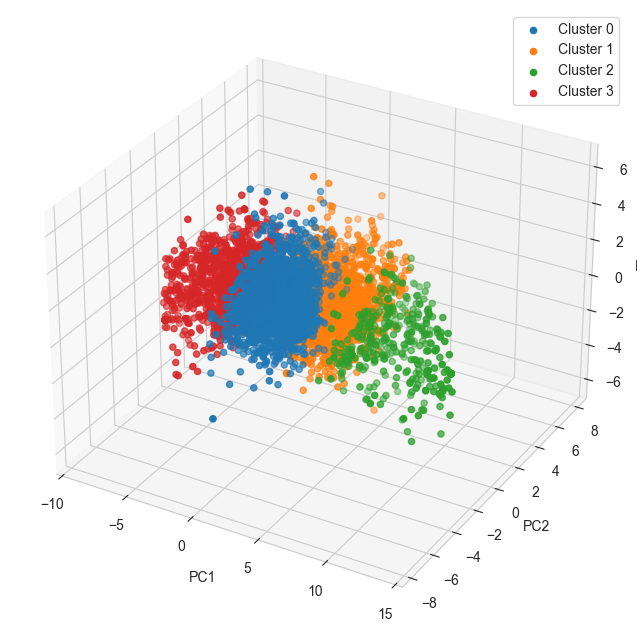

In [33]:
# Représentation en 3D dans l'espace des composantes principales
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_indices = fic_epita_kantar_codes[fic_epita_kantar_codes['cluster'] == cluster].index
    ax.scatter(features_pca[cluster_indices, 0], features_pca[cluster_indices, 1], features_pca[cluster_indices, 2], label=f'Cluster {cluster}')
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [38]:
components = pd.DataFrame(pca.components_, columns=columns, index=['PC1', 'PC2', 'PC3'])

# Afficher les coefficients
display(components)

# Trouver les 3 features les plus importantes pour chaque composante
top_features_per_pc = components.apply(lambda row: row.abs().nlargest(3).index.tolist(), axis=1)

# Affichage des résultats
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {', '.join(features)}")


,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
PC1,0.177909,0.170057,0.172720,0.176170,0.038071,0.095443,0.153264,0.184030,0.138516,0.171198,...,0.167606,0.199969,0.149465,0.197067,0.196668,0.182906,0.199193,0.192274,0.180557,0.182637
PC2,0.217004,0.282679,0.303319,0.282718,0.020671,-0.040342,0.051017,0.225561,0.077496,0.222978,...,-0.139584,-0.166950,-0.200108,-0.152942,-0.136421,-0.118632,-0.091337,-0.085644,-0.124872,-0.126204
PC3,-0.177379,-0.022327,0.001634,0.018567,0.324298,0.131739,0.340771,-0.078328,0.147323,-0.056715,...,-0.144154,-0.081350,-0.152574,-0.006185,-0.056328,0.085473,0.022660,0.153685,0.130416,0.245127


PC1: A11_5_slice, A11_10_slice, A11_7_slice
PC2: A9_3_slice, A9_4_slice, A9_2_slice
PC3: A10_8_slice, A10_3_slice, A9_7_slice


In [42]:
# Distribution des features principales par cluster
important_features = ['A11_5_slice', 'A11_10_slice', 'A11_7_slice']  # Exemple
cluster_analysis = fic_epita_kantar_codes.groupby('cluster')[important_features].mean(numeric_only=True)

display(cluster_analysis)

,A11_5_slice,A11_10_slice,A11_7_slice
cluster,,,
0,1.831780,1.878372,1.870525
1,2.212432,2.351776,2.258197
2,3.211382,3.295393,3.249322
3,1.175532,1.230496,1.202128


In [43]:
# Distribution des features principales par cluster
important_features = ['A9_3_slice', 'A9_4_slice', 'A9_2_slice']  # Exemple
cluster_analysis = fic_epita_kantar_codes.groupby('cluster')[important_features].mean(numeric_only=True)

display(cluster_analysis)

,A9_3_slice,A9_4_slice,A9_2_slice
cluster,,,
0,2.460520,2.404120,2.534085
1,3.226093,3.155738,3.214481
2,3.710027,3.734417,3.699187
3,1.951241,1.874113,2.000000


In [44]:
important_features = ['A10_8_slice', 'A10_3_slice', 'A9_7_slice']  # Exemple
cluster_analysis = fic_epita_kantar_codes.groupby('cluster')[important_features].mean(numeric_only=True)

display(cluster_analysis)

,A10_8_slice,A10_3_slice,A9_7_slice
cluster,,,
0,2.282491,2.422756,2.280039
1,2.806694,2.583333,3.111339
2,3.363144,2.701897,3.612466
3,1.678191,2.197695,1.690603
